In [28]:
import pandas as pd

In [35]:
srs = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [44]:
def min_max_scaling(srs):
    """
    Min-max scaling
    """
    return (srs.iloc[(len(srs) + 1)//2 - 1] - srs.min()) / (srs.max() - srs.min())

In [45]:
srs.rolling(window=3, center=True).apply(min_max_scaling)

0    NaN
1    0.5
2    0.5
3    0.5
4    0.5
5    0.5
6    0.5
7    0.5
8    0.5
9    NaN
dtype: float64

In [10]:
import sglm_pp as spp

ModuleNotFoundError: No module named 'sglm_pp'

In [47]:
from typing import Union, List, Optional
import numpy as np


def min_max_scale(X: float, lower_bound: float, upper_bound: float) -> Union[np.ndarray, pd.DataFrame]:
    """
    Scale values of X to be between 0 and 1.
    
    JZ 2020
    
    Args:
        X: Input data
    
    Returns:
        Scaled values
    """
    return (X - lower_bound) / (upper_bound - lower_bound)

def lambda_min_max(X: pd.Series) -> float:
    """
    Lambda function for min_max_scale
    
    JZ 2020
    """
    lower_bound = X.quantile(0.05) # X.min()
    upper_bound = X.quantile(0.95) # X.max()
    return min_max_scale(X.iloc[(len(X) + 1)//2 - 1], lower_bound, upper_bound)

    # return min_max_scale(X.iloc[-1], X.min(), X.max())

def detrend_data(X: pd.DataFrame, detrend_col: str, grouping_cols: List[str], window: int, standardize: Optional[bool]=False) -> pd.DataFrame:
    """
    Detrend data by removing a trend from a column.
    
    JZ 2020
    
    Args:
        X: Input data
        detrend_col: Column to detrend
        grouping_cols: Columns to group by
        window: Window size for detrending
    
    Returns:
        Detrended data
    """
    if grouping_cols:
        ret = X.groupby(grouping_cols)[detrend_col].rolling(window=window*2, center=True).apply(lambda_min_max)
    else:
        ret = X[detrend_col].rolling(window=window*2, center=True).apply(lambda_min_max)

    # if standardize:
    #     ret = (ret - ret.mean()) / ret.std()
    
    return ret

In [48]:
df = pd.DataFrame([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 0], [1, 9], [1, 1],
                   [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 0], [2, 9], [2, 1]], columns=['a', 'b'])

<AxesSubplot:>

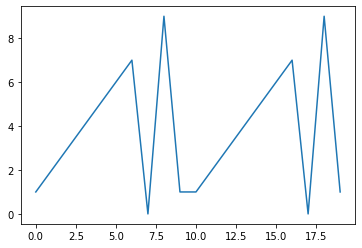

In [51]:
df['b'].plot()

<AxesSubplot:>

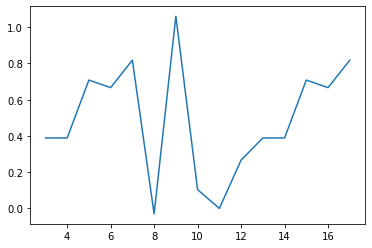

In [55]:
detrend_data(df, 'b', [], 3).plot()